In [1]:
#### Load all types of toronto rooms
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
fig1 = plt.figure(figsize=(2, 2), dpi=100)
%config InlineBackend.figure_format = 'retina'
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
# Import Multiple CSVs and combining them
Total_filepath = "C:/Users/fahmida/Desktop/Rental/Toronto_Investment.csv"
df= pd.read_csv(Total_filepath) 

# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_df = df.corr(method='spearman')
corr_df.to_csv("C:/Users/fahmida/Desktop/Rental/permanent_network.csv")


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "

<Figure size 200x200 with 0 Axes>

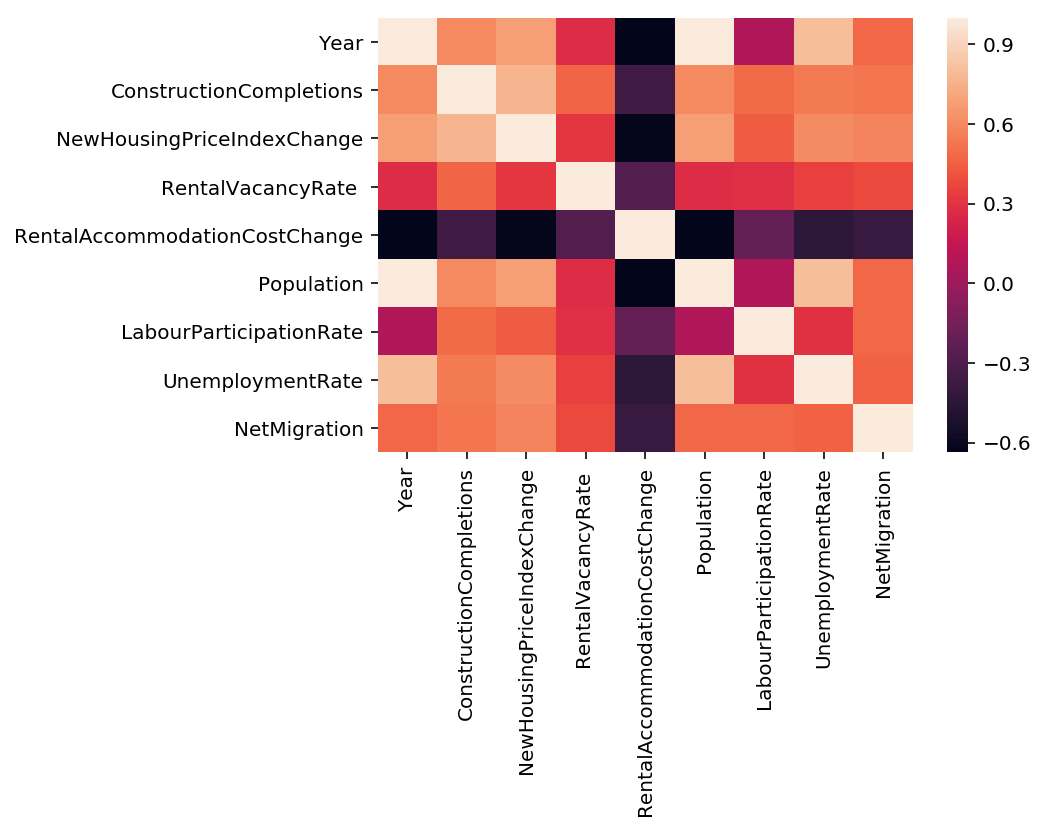

In [2]:
# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_df)

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [3]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
# Grab edge list data hosted on Gist
edgelist = pd.read_csv('C:/Users/fahmida/Desktop/Rental/permanent_network1.csv')
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,Yr,Yr,Y,1.000000,red,0
1,Invest,Yr,Y,0.598291,red,0
2,HousingIndex,Yr,Y,0.674603,red,0
3,Vacancy,Yr,Y,0.274007,red,0
4,Rent,Yr,Y,-0.637252,red,0
5,Pop,Yr,Y,1.000000,red,0
6,Lab,Yr,Y,0.074481,red,0
7,Unemp,Yr,Y,0.803299,red,0
8,Mig,Yr,Y,0.477179,red,0
9,Yr,Invest,C,0.598291,gray,0


In [4]:
# Grab node list data hosted on Gist
nodelist = pd.read_csv('C:/Users/fahmida/Desktop/edges.csv')

In [5]:
g = nx.Graph()

In [6]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [7]:
# Edge list example
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[2:].to_dict()) # edge attribute dict

Mig
Mig
{'color': 'cyan', 'trail': 'M', 'estimate': 0L, 'distance': 1.0}


In [8]:
# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())

In [9]:
print(nlrow)

id     Mig
X     1800
Y      800
Name: 8, dtype: object


In [10]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 45
# of nodes: 9


In [11]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'HousingIndex': (3164L, -1111L),
 'Invest': (716L, -1357L),
 'Lab': (3500L, -1200L),
 'Pop': (4000L, -900L),
 'Vacancy': (141L, -1938L)}

In [12]:
print('# of edges: {}'.format(g.edges()))


# of edges: [('HousingIndex', 'HousingIndex'), ('HousingIndex', 'Lab'), ('HousingIndex', 'Invest'), ('HousingIndex', 'Pop'), ('HousingIndex', 'Vacancy'), ('HousingIndex', 'Rent'), ('HousingIndex', 'Mig'), ('HousingIndex', 'Unemp'), ('HousingIndex', 'Yr'), ('Lab', 'Lab'), ('Lab', 'Invest'), ('Lab', 'Pop'), ('Lab', 'Vacancy'), ('Lab', 'Rent'), ('Lab', 'Mig'), ('Lab', 'Unemp'), ('Lab', 'Yr'), ('Invest', 'Invest'), ('Invest', 'Pop'), ('Invest', 'Vacancy'), ('Invest', 'Rent'), ('Invest', 'Mig'), ('Invest', 'Unemp'), ('Invest', 'Yr'), ('Pop', 'Pop'), ('Pop', 'Vacancy'), ('Pop', 'Rent'), ('Pop', 'Mig'), ('Pop', 'Unemp'), ('Pop', 'Yr'), ('Vacancy', 'Vacancy'), ('Vacancy', 'Rent'), ('Vacancy', 'Mig'), ('Vacancy', 'Unemp'), ('Vacancy', 'Yr'), ('Rent', 'Rent'), ('Rent', 'Mig'), ('Rent', 'Unemp'), ('Rent', 'Yr'), ('Mig', 'Mig'), ('Mig', 'Unemp'), ('Mig', 'Yr'), ('Unemp', 'Unemp'), ('Unemp', 'Yr'), ('Yr', 'Yr')]


In [13]:
# Define data structure (list) of edge colors for plotting
edge_colors = edgelist['color'].tolist()
print(edge_colors)

print("dfToList is", edge_colors, "and it's a", type(edge_colors))




['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'brown', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']
('dfToList is', ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yellowgreen', 'yel

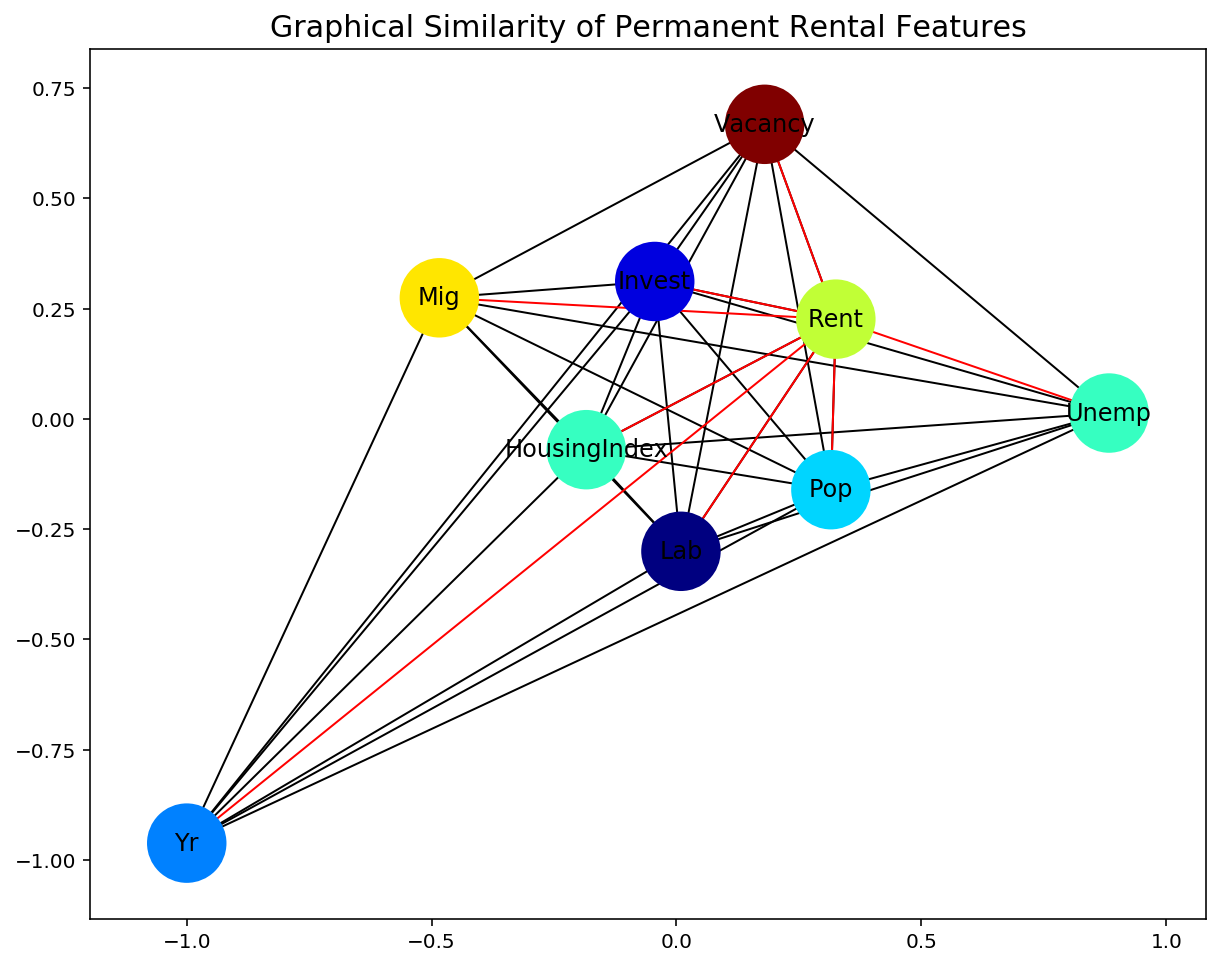

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([('HousingIndex', 'HousingIndex'), ('HousingIndex', 'Lab'), ('HousingIndex', 'Invest'), ('HousingIndex', 'Pop'), ('HousingIndex', 'Vacancy'), ('HousingIndex', 'Rent'), ('HousingIndex', 'Mig'), ('HousingIndex', 'Unemp'), ('HousingIndex', 'Yr'), ('Lab', 'Lab'), ('Lab', 'Invest'), ('Lab', 'Pop'), ('Lab', 'Vacancy'), ('Lab', 'Rent'), ('Lab', 'Mig'), ('Lab', 'Unemp'), ('Lab', 'Yr'), ('Invest', 'Invest'), ('Invest', 'Pop'), ('Invest', 'Vacancy'), ('Invest', 'Rent'), ('Invest', 'Mig'), ('Invest', 'Unemp'), ('Invest', 'Yr'), ('Pop', 'Pop'), ('Pop', 'Vacancy'), ('Pop', 'Rent'), ('Pop', 'Mig'), ('Pop', 'Unemp'), ('Pop', 'Yr'), ('Vacancy', 'Vacancy'), ('Vacancy', 'Rent'), ('Vacancy', 'Mig'), ('Vacancy', 'Unemp'), ('Vacancy', 'Yr'), ('Rent', 'Rent'), ('Rent', 'Mig'), ('Rent', 'Unemp'), ('Rent', 'Yr'), ('Mig', 'Mig'), ('Mig', 'Unemp'), ('Mig', 'Yr'), ('Unemp', 'Unemp'), ('Unemp', 'Yr'), ('Yr', 'Yr')])
val_map = {'Unemp': 80,
           'Invest': 40,
           'Pop': 70,
           'Yr': 60,
            'HousingIndex': 80,
           'Vacancy':150,
           'Rent':100,
           'Lab':30,
           'Mig':110
          }

values = [val_map.get(node, 0.4) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('Rent', 'Unemp'),('Rent', 'HousingIndex'),('Rent', 'Invest'),('Rent', 'Pop'),('Rent', 'Yr'),('Rent', 'Vacancy'),('Rent', 'Lab'),('Rent', 'Mig')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 1500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)

plt.title('Graphical Similarity of Permanent Rental Features', size=15)
plt.show()